<a href="https://colab.research.google.com/github/tomiwagold/Patient-Diabetes-Prediction/blob/main/Healthcare_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HealthCare Project: Patient Disease Prediction



# 1. Import all necessary Libraries and load dataset

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import streamlit as st

In [ ]:
# Load Dataset
df = pd.read_csv("/content/healthcare_data.csv")

df.head()

,Age,Gender,BMI,BloodPressure,CholesterolLevel,HeartRate,Diabetes,Hypertension,SmokingStatus,PhysicalActivity,HospitalVisits,DiagnosedDisease
0,71,Female,22.21,107,259,74,0,1,Current Smoker,6,4,NaN
1,34,Female,29.09,137,195,82,0,0,Non-smoker,8,0,NaN
2,80,Male,37.04,98,177,117,0,0,Current Smoker,0,0,NaN
3,40,Female,23.31,90,236,56,0,0,Former Smoker,2,3,NaN
4,43,Male,19.73,98,184,115,0,0,Former Smoker,4,1,Hypertension


# 2. Data Preprocessing

In [ ]:
# Encode Gender, smoking status and diagnosed disease using Label Encoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['SmokingStatus'] = le.fit_transform(df['SmokingStatus'])
df['DiagnosedDisease'] = le.fit_transform(df['DiagnosedDisease'])

In [ ]:
df.head()

,Age,Gender,BMI,BloodPressure,CholesterolLevel,HeartRate,Diabetes,Hypertension,SmokingStatus,PhysicalActivity,HospitalVisits,DiagnosedDisease
0,71,0,22.21,107,259,74,0,1,0,6,4,4
1,34,0,29.09,137,195,82,0,0,2,8,0,4
2,80,1,37.04,98,177,117,0,0,0,0,0,4
3,40,0,23.31,90,236,56,0,0,1,2,3,4
4,43,1,19.73,98,184,115,0,0,1,4,1,2


# 3. Split data into features and target

In [ ]:
X = df.drop(columns=['DiagnosedDisease'])
y = df['DiagnosedDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 11)
(4000,)
(1000, 11)
(1000,)


In [ ]:
# Feature Scaling: Scale features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Train Classification Model: RandomForest Classifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy Score: {accuracy:.2f}")
print("Classification Report: \n", report)

Accuracy Score: 0.51
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.03      0.05       154
           1       0.24      0.04      0.06       169
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00        51
           4       0.52      0.97      0.68       517

    accuracy                           0.51      1000
   macro avg       0.23      0.21      0.16      1000
weighted avg       0.37      0.51      0.37      1000



In [ ]:
params_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20,30],
    "min_samples_split": [2, 5,10],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=params_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Train RandomForest Model best on Best Parameter

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.52
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       154
           1       0.00      0.00      0.00       169
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00        51
           4       0.52      1.00      0.68       517

    accuracy                           0.52      1000
   macro avg       0.30      0.20      0.14      1000
weighted avg       0.42      0.52      0.35      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

Accuracy Score: 0.42


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

Accuracy Score: 0.49


<ipython-input-17-ac7efdde6658>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(range(len(feature_importances)), feature_importances [sorted_indices], align="center")


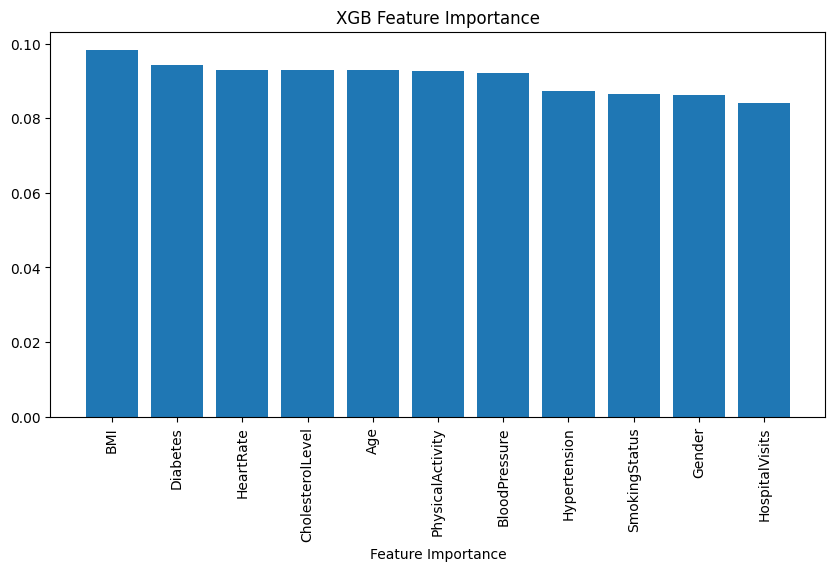

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)
feature_names = X.columns

sorted_indices = np.argsort(feature_importances) [::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances [sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array (feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature Importance")
plt.title("XGB Feature Importance")
plt.show()

In [ ]:
df['DiagnosedDisease'].value_counts()

,count
DiagnosedDisease,
4,2539
1,984
0,745
2,511
3,221


In [ ]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.49
              precision    recall  f1-score   support

           0       0.16      0.03      0.04       154
           1       0.12      0.02      0.03       169
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00        51
           4       0.51      0.94      0.66       517

    accuracy                           0.49      1000
   macro avg       0.16      0.20      0.15      1000
weighted avg       0.31      0.49      0.36      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


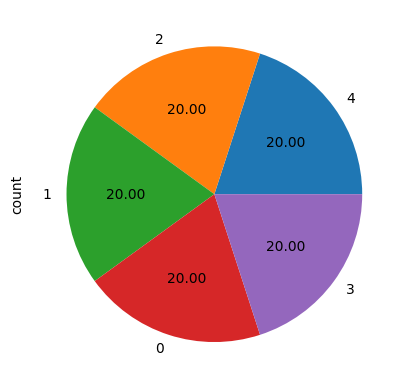

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy= 'auto')
X_ros, y_ros = ros.fit_resample(X, y)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

Accuracy Score: 0.64
